In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score



In [20]:
# File path for the dataset
file_path = "synthetic_coca_cola_sentiment_analysis.csv"

# Load the dataset
data = pd.read_csv(file_path)



In [21]:
# Check for missing values and drop if any
data = data.dropna(subset=['Title', 'Description', 'Sentiment'])

# Combine title and description for text features
data['Text'] = data['Title'] + " " + data['Description']

# Calculate sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()



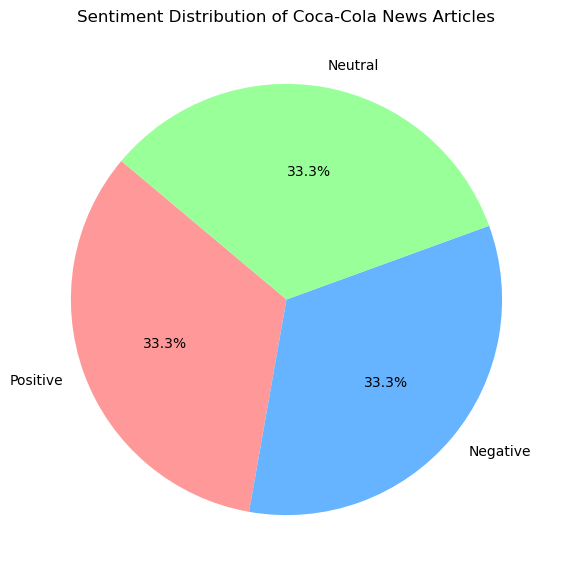

In [22]:
# Generate a pie chart for sentiment distribution
plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution of Coca-Cola News Articles')
plt.show()



In [23]:
# Calculate word counts for each sentiment category
data['WordCount'] = data['Text'].apply(lambda x: len(x.split()))
sentiment_word_counts = data.groupby('Sentiment')['WordCount'].sum()

# Display the word counts for each sentiment
print("Word count for each sentiment category:")
print(sentiment_word_counts)



Word count for each sentiment category:
Sentiment
Negative    43993
Neutral     41763
Positive    43162
Name: WordCount, dtype: int64


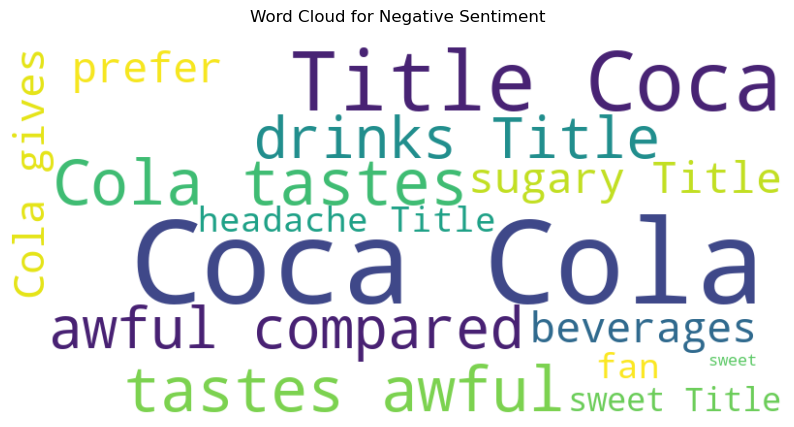

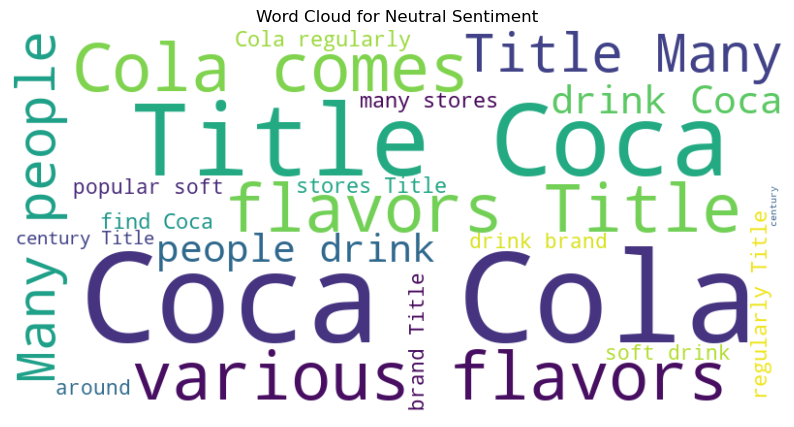

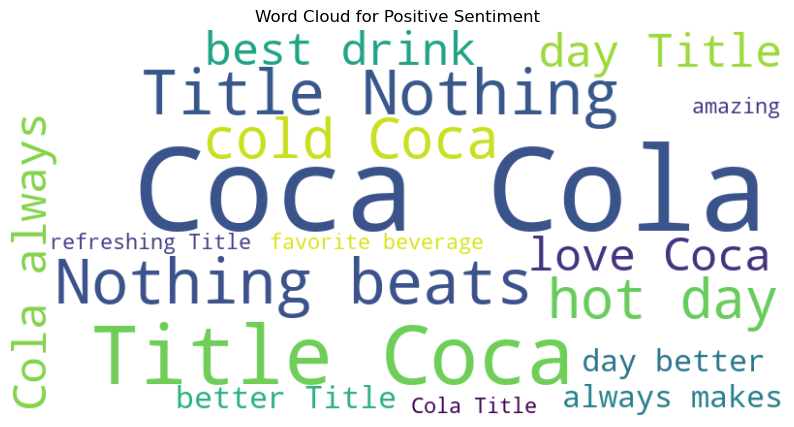

In [24]:
# Generate and display word clouds for each sentiment category
for sentiment in sentiment_word_counts.index:
    text = ' '.join(data[data['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()



In [25]:
# Define features and target for SVM
X = data['Text']
y = data['Sentiment']



In [26]:
# Convert text data into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vect = vectorizer.fit_transform(X)



In [27]:
# Convert the target variable to a numeric format for ROC curve
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)



In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y_numeric, test_size=0.2, random_state=42)



In [29]:
# Initialize and train the SVM classifier
model = SVC(kernel='linear', probability=True)  # Enable probability estimates for ROC curve
model.fit(X_train, y_train)



SVC(kernel='linear', probability=True)

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve



In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       970
     Neutral       1.00      1.00      1.00       993
    Positive       1.00      1.00      1.00      1037

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



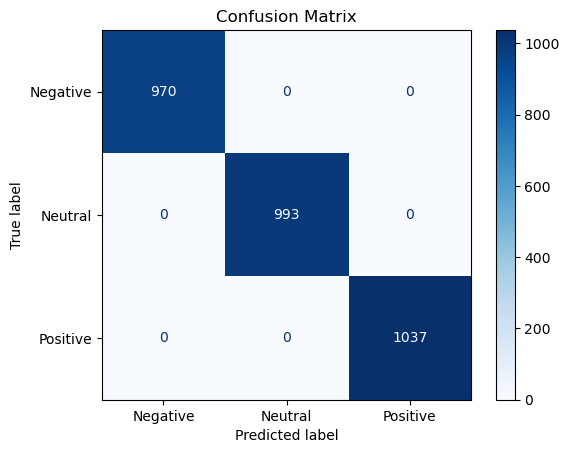

In [32]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()




In [33]:
import joblib

# Save the trained SVM model
model_filename = 'svm_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")



Model saved as svm_model.pkl


In [34]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a trained vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Use the same parameters
vectorizer.fit(X)  # Fit on the same training data used for SVM

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']